# **New York City Airbnb Open Data**

The goal of these data is to understand Host behavior, Geographical Insights, Pricing Patterns, Prediction and Recommendations, Market Trends, Host Profiling

**Data Source :** https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

* **id:** A unique identifier for each listing.
* **name:** The name or title of the listing.
* **host_id:** The unique identifier for the host of the listing.
* **host_name:** The name of the host.
* **neighbourhood_group:** The borough or neighbourhood group where the listing is located (e.g., Brooklyn, Manhattan).
* **neighbourhood:** The specific neighbourhood where the listing is situated.
* **latitude:** The geographical latitude of the listing.
* **longitude:** The geographical longitude of the listing.
* **room_type:** The type of room available (e.g., Private room, Entire home/apt).
* **price:** The price per night for the listing.
* **minimum_nights:** The minimum number of nights required for booking.
* **number_of_reviews:** The total number of reviews received for the listing.
* **last_review:** The date of the last review.
* **reviews_per_month:** The average number of reviews per month.
* **calculated_host_listings_count:** The count of listings by the host.
* **availability_365:** The number of days the listing is available in a year.

**Importing necessary libraries**

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

**Reading the data using pandas library**

In [27]:
data = pd.read_csv(r'data\AB_NYC_2019.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Structure of the data**

In [28]:
data.shape

(48895, 16)

**Basic information of the data**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The data contains int, float, object data type columns 

**Statistics**

In [30]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The dataset consists of 48,895 rows for each column.

The mean values provide insights into the average across all columns.

Standard deviation values reveal the extent of variability within each column.

The minimum and maximum counts in each column show variations.

Latitude and longitude exhibit minimal differences throughout the dataset.

Price demonstrates considerable fluctuations at all stages.

Minimum_nights stay consistently below 5 nights until the 75th percentile, suggesting shorter stays for most individuals.

However, there are instances of extended stays beyond the 75th percentile.

Number_of_reviews displays a significant increase beyond the 50th percentile, indicating heightened activity and attention for certain entries in the dataset.

**Missing values**

In [31]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

name: 16 missing values

host_name: 21 missing values

last_review: 10,052 missing values

reviews_per_month: 10,052 missing values

**Duplicated values**

In [32]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

There is no duplicated values

**checking unique values**

In [33]:
unique_values_per_column = data.nunique()
print(unique_values_per_column)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


It shows only neighbourhood_group and room_type are categorical column

In [34]:
unique_values1 = data['room_type'].unique()
unique_values2 = data['neighbourhood_group'].unique()

print(unique_values1)
print(unique_values2)


['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


**Visualization of data**

Histogram plot

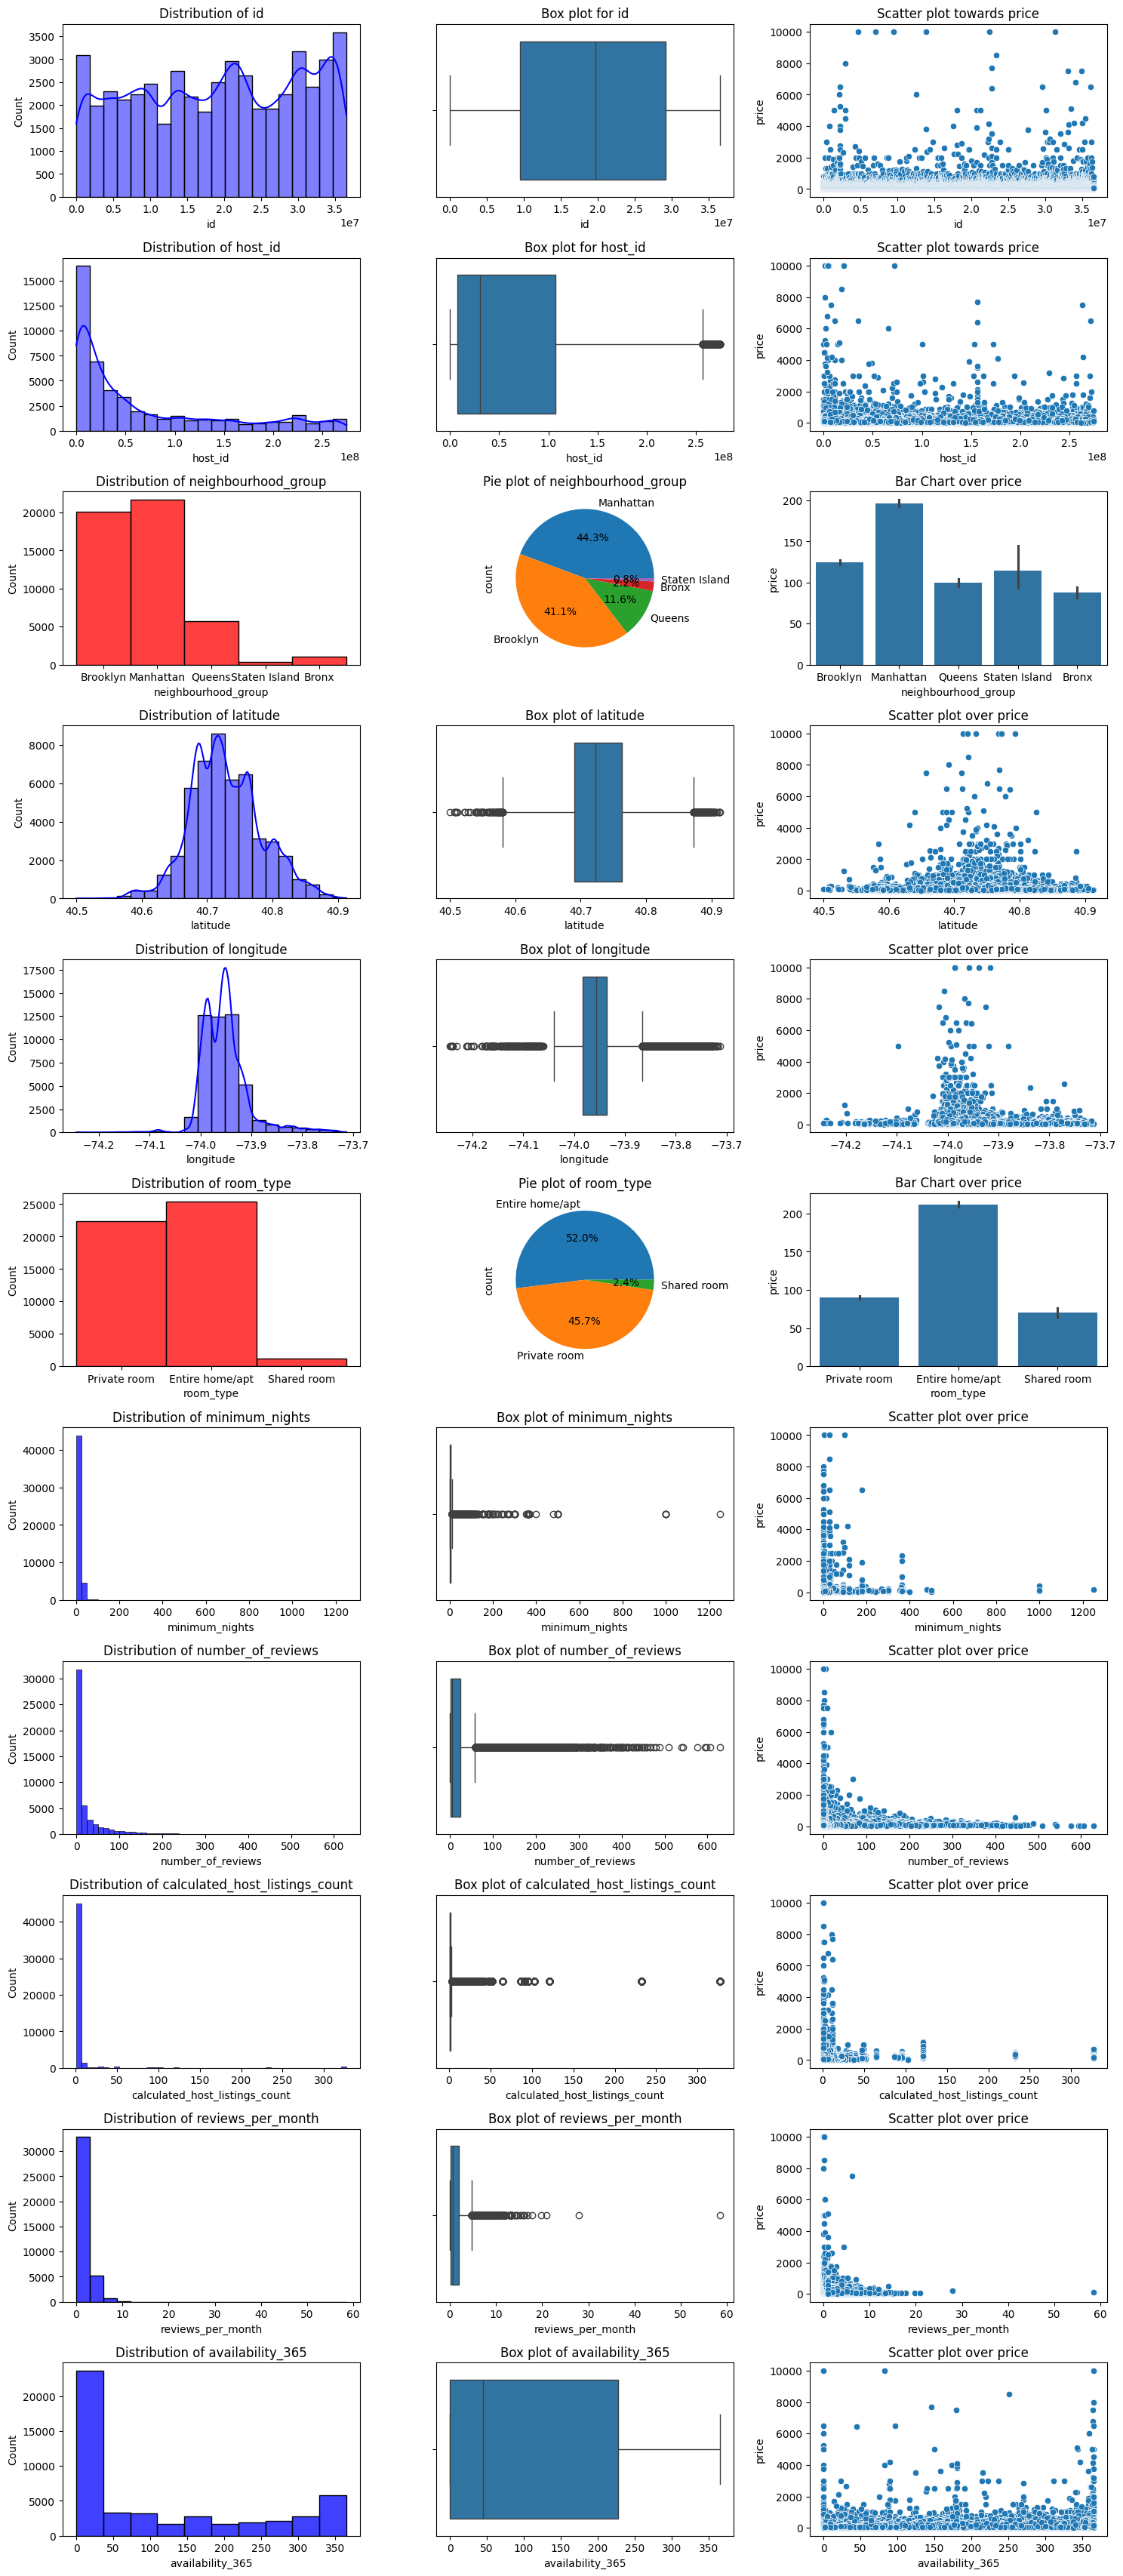

In [35]:
plt.figure(figsize=(15,40))

# creating subplots for id
plt.subplot(13,3,1)
sns.histplot(data=data, x='id', bins=20, kde=True, color='Blue')
plt.title("Distribution of id")

plt.subplot(13,3,2)
sns.boxplot(data=data, x='id')
plt.title("Box plot for id")

plt.subplot(13,3,3)
sns.scatterplot(data=data, x='id', y='price', markers=False)
plt.title('Scatter plot towards price')

# creating subplot for host_id
plt.subplot(13,3,4)
sns.histplot(data=data, x='host_id', bins=20, kde=True, color='Blue')
plt.title("Distribution of host_id")

plt.subplot(13,3,5)
sns.boxplot(data=data, x='host_id')
plt.title("Box plot for host_id")

plt.subplot(13,3,6)
sns.scatterplot(data=data, x='host_id', y='price', markers=False)
plt.title('Scatter plot towards price')

# creating subplot for  neighbourhood_group 
plt.subplot(13,3,7)
sns.histplot(data=data, x='neighbourhood_group', bins=5, color='Red')
plt.title('Distribution of neighbourhood_group')

plt.subplot(13,3,8)
data['neighbourhood_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie plot of neighbourhood_group')

plt.subplot(13,3,9)
sns.barplot(data=data, x='neighbourhood_group', y='price', estimator=np.mean)
plt.title('Bar Chart over price')

# creating subplot for latitude
plt.subplot(13,3,10)
sns.histplot(data=data, x='latitude', bins=20, kde=True, color='Blue')
plt.title('Distribution of latitude ')

plt.subplot(13,3,11)
sns.boxplot(data=data, x='latitude')
plt.title('Box plot of latitude')

plt.subplot(13,3,12)
sns.scatterplot(data=data, x='latitude', y='price')
plt.title('Scatter plot over price')

# creating subplot for longitude
plt.subplot(13,3,13)
sns.histplot(data=data, x='longitude', bins=20, kde=True, color='Blue')
plt.title('Distribution of longitude')

plt.subplot(13,3,14)
sns.boxplot(data=data, x='longitude')
plt.title('Box plot of longitude')

plt.subplot(13,3,15)
sns.scatterplot(data=data, x='longitude', y='price')
plt.title('Scatter plot over price')

# creating subplot for room-type
plt.subplot(13,3,16)
sns.histplot(data=data, x='room_type', bins=3, color='Red')
plt.title('Distribution of room_type')

plt.subplot(13,3,17)
data['room_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie plot of room_type')

plt.subplot(13,3,18)
sns.barplot(data=data, x='room_type', y='price', estimator=np.mean)
plt.title('Bar Chart over price')

# creating subplot for minimum_nights
plt.subplot(13,3,19)
sns.histplot(data=data, x='minimum_nights', bins=50, color='Blue')
plt.title('Distribution of minimum_nights')

plt.subplot(13,3,20)
sns.boxplot(data=data, x='minimum_nights')
plt.title('Box plot of minimum_nights')

plt.subplot(13,3,21)
sns.scatterplot(data=data, x='minimum_nights', y='price')
plt.title('Scatter plot over price')

# creating subplot for number_of_reviews
plt.subplot(13,3,22)
sns.histplot(data=data, x='number_of_reviews', bins=50, color='Blue')
plt.title('Distribution of number_of_reviews')

plt.subplot(13,3,23)
sns.boxplot(data=data, x='number_of_reviews')
plt.title('Box plot of number_of_reviews')

plt.subplot(13,3,24)
sns.scatterplot(data=data, x='number_of_reviews', y='price')
plt.title('Scatter plot over price')

# creating subplot for calculated_host_listings_count
plt.subplot(13,3,25)
sns.histplot(data=data, x='calculated_host_listings_count', bins=50, color='Blue')
plt.title('Distribution of calculated_host_listings_count')

plt.subplot(13,3,26)
sns.boxplot(data=data, x='calculated_host_listings_count')
plt.title('Box plot of calculated_host_listings_count')

plt.subplot(13,3,27)
sns.scatterplot(data=data, x='calculated_host_listings_count', y='price')
plt.title('Scatter plot over price')

# creating subplot for reviews_per_month
plt.subplot(13,3,28)
sns.histplot(data=data, x='reviews_per_month', bins=20, color='Blue')
plt.title('Distribution of reviews_per_month')

plt.subplot(13,3,29)
sns.boxplot(data=data, x='reviews_per_month')
plt.title('Box plot of reviews_per_month')

plt.subplot(13,3,30)
sns.scatterplot(data=data, x='reviews_per_month', y='price')
plt.title('Scatter plot over price')

# creating subplot for availability_365
plt.subplot(13,3,31)
sns.histplot(data=data, x='availability_365', bins=10, color='Blue')
plt.title('Distribution of availability_365')

plt.subplot(13,3,32)
sns.boxplot(data=data, x='availability_365')
plt.title('Box plot of availability_365')

plt.subplot(13,3,33)
sns.scatterplot(data=data, x='availability_365', y='price')
plt.title('Scatter plot over price')

plt.tight_layout()
plt.show()

**HISTOGRAM PLOT**
* id has a uniform distribution with a slight increase towards the middle values.
* host_id has a right-skewed distribution with a median around 75 and outliers above 100.
* neighbourhood_group has a bimodal distribution with peaks around -50 and 50.
* latitude has a right-skewed distribution with most values below 20.
* longitude has a normal distribution with a mean of 0 and a standard deviation of 1.
* minimum_nights has a symmetric distribution with a median near 0 and outliers on both ends, but more concentrated on the positive side.
* number_of_reviews has a right-skewed distribution with most values below 10.
* calculated_host_listings_count has a left-skewed distribution with most values around 0 and a few outliers on the negative side.
* reviews_per_month has a right-skewed distribution with a median around 10 and outliers above 20.
* availability_365 has a right-skewed distribution with most values below 5.

**BOX PLOT**
* id has a minimum of -100, a maximum of 100, a median of 0, and no outliers.
* host_id has a minimum of 0, a maximum of 150, a median of 75, and outliers above 100.
* neighbourhood_group has a minimum of -100, a maximum of 100, a median of 0, and no outliers.
* latitude has a minimum of 0, a maximum of 40, a median of 10, and outliers above 30.
* longitude has a minimum of -3, a maximum of 3, a median of 0, and no outliers.
* minimum_nights has a minimum of -10, a maximum of 10, a median of 0, and outliers below -5 and above 5.
* number_of_reviews has a minimum of 0, a maximum of 20, a median of 5, and outliers above 15.
* calculated_host_listings_count has a minimum of -10, a maximum of 10, a median of 0, and outliers below -5 and above 5.
* reviews_per_month has a minimum of 0, a maximum of 40, a median of 10, and outliers above 20.
* availability_365 has a minimum of 0, a maximum of 10, a median of 2, and outliers above 7.

**Scatter plot**
* id has no clear correlation with price, as the points are scattered randomly.
* host_id has a weak positive correlation with price, as the points show a slight upward trend.
* neighbourhood_group has no clear correlation with price, as the points are scattered randomly.
* latitude has a weak negative correlation with price, as the points show a slight downward trend.
* longitude has no clear correlation with price, as the points are scattered randomly.
* minimum_nights has a weak positive correlation with price, as the points show a slight upward trend.
* number_of_reviews has a weak negative correlation with price, as the points show a slight downward trend.
* calculated_host_listings_count has a weak positive correlation with price, as the points show a slight upward trend.
* reviews_per_month has a weak positive correlation with price, as the points show a slight upward trend.
* availability_365 has no clear correlation with price, as the points are scattered randomly.

**Pie chart**
* room_type has about 44.3% - Manhattan, 41.1% -Booklyn and the rest by others
* house floors has about 70% of the data having less than two floors, and the rest having two or more floors.

**Bar chart**
* house region has an almost equal distribution among categories 1, 2, 3, and 4, with each having about 25% of the data.
* house type has a majority of the data in the inner city, followed by the suburbs and the rural area, and the least in the town.
* house type has an almost equal number of houses in the detached and semi-detached categories, while the terraced houses are fewer.

**Correlation Matrix**

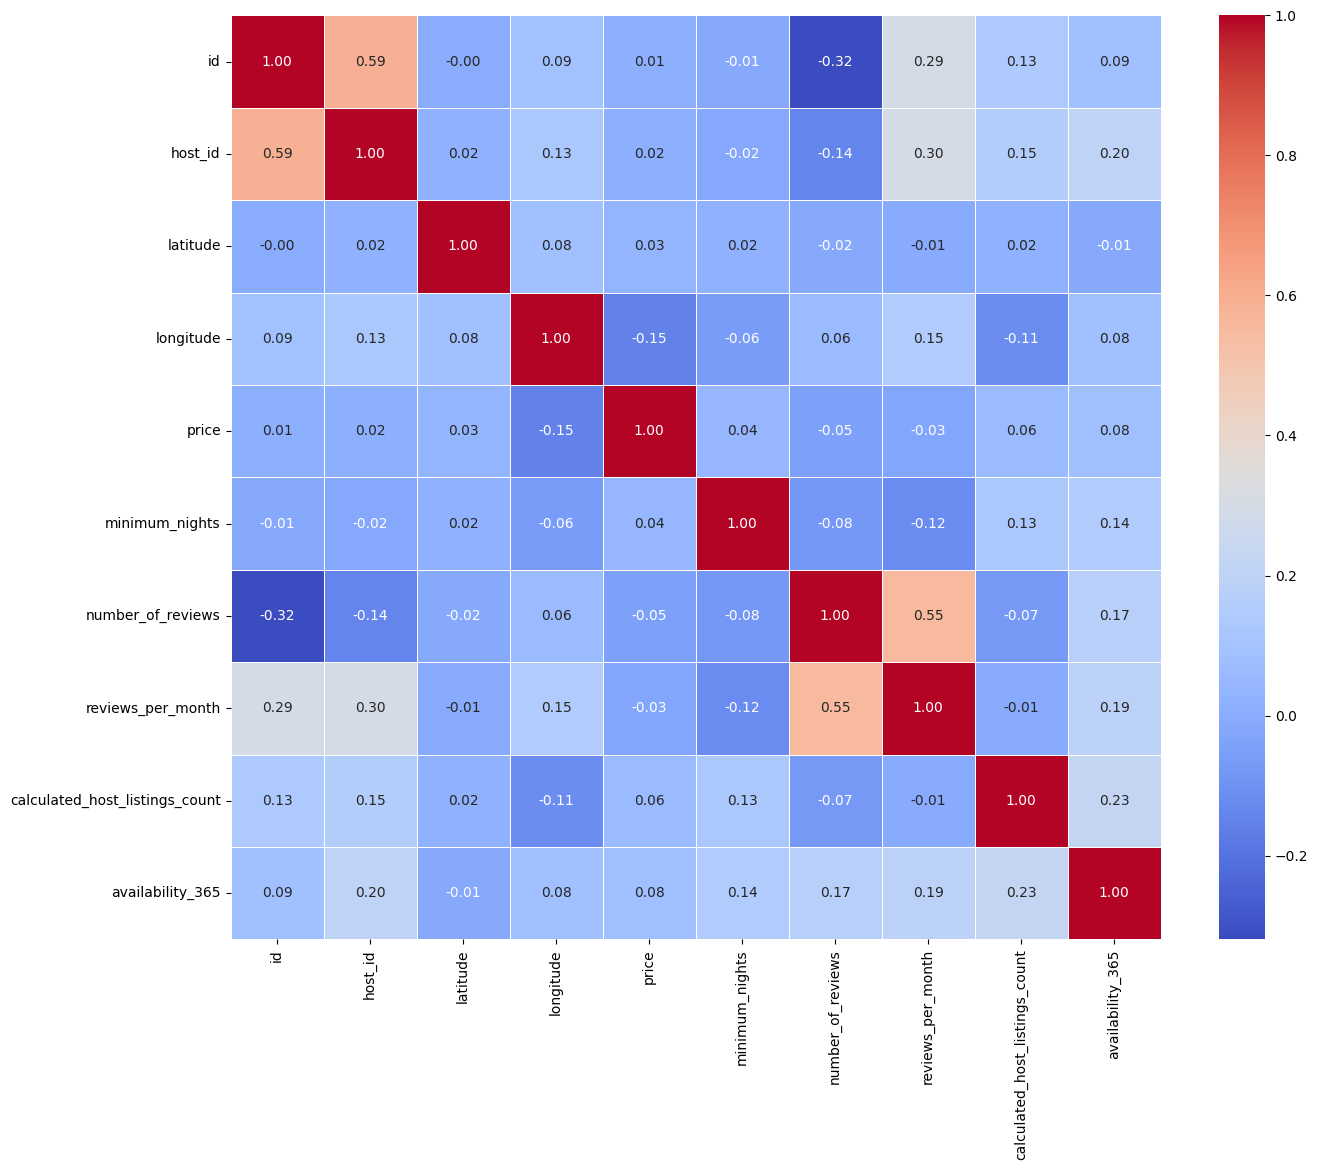

In [36]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])

#set the size of heatmap
plt.figure(figsize=(15,12))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [37]:
numerical_features.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


### **High Correlations:**

**1.Number of Reviews and Reviews per Month:**

* Correlation coefficient: 0.549868
* Interpretation: These two variables have a strong positive correlation, suggesting that properties with more reviews tend to receive reviews at a higher monthly rate.

**2.Host ID and Availability (365 days):**

* Correlation coefficient: 0.203492
* Interpretation: There is a moderate positive correlation between 'host_id' and 'availability_365,' indicating that hosts with more properties tend to have higher availability throughout the year.

**3.ID and Host ID:**

* Correlation coefficient: 0.588290
* Interpretation: There is a moderate positive correlation between 'id' and 'host_id,' indicating that as 'id' increases, 'host_id' tends to increase as well.

### **Low Correlations:**

**4.Latitude and ID:**

* Correlation coefficient: -0.003125
* Interpretation: The correlation between 'latitude' and 'id' is negligible, suggesting that there is very little linear relationship between these two variables.

**5.Longitude and Price:**

* Correlation coefficient: -0.150019
* Interpretation: The correlation between 'longitude' and 'price' is weakly negative, indicating a slight tendency for properties with lower prices to be located at certain longitudes.

**6.Reviews per Month and Calculated Host Listings Count:**

* Correlation coefficient: -0.009421
* Interpretation: There is a very weak negative correlation between 'reviews_per_month' and 'calculated_host_listings_count,' suggesting that these two variables are not strongly related.

**Feature Engineering**

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

def processed_data(data) -> pd.DataFrame:
    # columns to drop
    col_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood_group', 'neighbourhood']
    data = data.drop(col_to_drop, axis=1)

    # Label encoding the categorical column
    encoder = LabelEncoder()
    col_to_encode = ['room_type']
    data['room_type'] = encoder.fit_transform(data[col_to_encode])

    # Min - Max scaling for the data
    col_to_scale = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
    scaler = MinMaxScaler()
    data[col_to_scale] = scaler.fit_transform(data[col_to_scale]).round(4)

# Example usage:
processed_data(data)


**CONCLUSION**

* Analysis of the dataset reveals that a substantial portion (86%) of tourists prefer accommodations in the Brooklyn and Manhattan neighborhoods within the 'neighbourhood_group' category.

* The preference for these locations is significantly influenced by the latitude of their geographical positions.

* Notably, hotels in Brooklyn tend to be situated at latitudes above 40.60, while those in Manhattan are found at latitudes above 40.70.

* The analysis strongly indicates that hotels located at higher latitudes tend to attract a greater number of tourists.

* Further segmentation by 'room_type' shows that private rooms and entire home/apartment accommodations collectively account for 97% of bookings, emphasizing the popularity of these lodging options among tourists.

* To optimize pricing strategies, particular attention should be given to hotels situated in higher latitudes, specifically in the Manhattan 'neighbourhood_group,' and with a focus on private rooms and entire home/apartment room types.

* An additional noteworthy factor affecting rental prices is the availability of hotels throughout the year. Increased availability positively correlates with higher rental prices.

* The 'calculated_host_listings_count' variable also demonstrates a positive association with rental prices, suggesting that properties managed by hosts with a higher listing count may command higher rates.

The analysis underscores the significance of location, room type, availability, and the host's listing count in determining rental prices. Strategic emphasis on hotels in Manhattan, particularly those with higher latitude locations and offering private rooms or entire home/apartment options, may contribute to optimizing pricing strategies and enhancing overall business performance.